# Exercise 1.1

\begin{align}
\frac{\partial J}{\partial b} &= \sum ^n _{i = 1} \frac{\partial J}{\partial z_i}\cdot\frac{\partial z_i}{\partial b} = \frac{2}{n}\sum^n_{i=1}\left(z_i-y_i\right) \\
\frac{\partial J}{\partial w_j} &= \sum ^n _{i = 1} \frac{\partial J}{\partial z_i}\cdot\frac{\partial z_i}{\partial w_j} = \frac{2}{n}\sum^n_{i=1}\left(z_i-y_i\right)x_{ij}
\end{align}

# Exercise 1.2

\begin{align}
\frac{\partial J}{\partial z_i} &= \frac{2}{n}\left(z_i-y_i\right)\\
\frac{\partial z_i}{\partial b} &= 1\\
\frac{\partial z_i}{\partial w_j} &= x_{ij}\label{5}
\end{align}

# Exercise 1.4

final loss1 =  23.9436629386031
final loss2 =  10.881262763231579


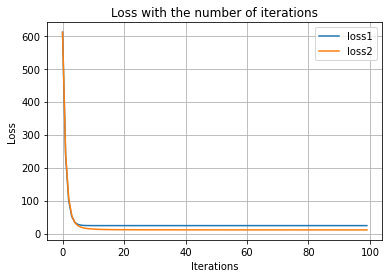

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_auto(x):
    Auto = pd.read_csv('Auto.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
    if x == 2:
        X_train = Auto[['cylinders','displacement','horsepower','weight', 'acceleration','year','origin']].values
    else:
        X_train = Auto[['horsepower']].values
    Y_train = Auto[['mpg']].values
    return X_train, Y_train

def gradient_method(x, y):
    m,n = np.shape(x)
    x_mean = [0 for j in range(n)] #mean of x
    x_std = [0 for j in range(n)] #standard deviation of x

    for j in range(n):
        x_mean[j] = np.mean([x[i][j] for i in range(m)])
        x_std[j] = np.std([x[i][j] for i in range(m)])

    for i in range(m): #normalization 
        x[i] = [ (x[i][j] - x_mean[j]) / x_std[j] for j in range(n)]

    w = [0 for j in range(n)]
    b = 0
    alpha = 0.2 #step length/learning rate
    z = [0 for i in range(m)]
    gradientOfw = [0 for j in range(n)]

    loss = []

    for iteration in range(0,100):
        for i in range(m):
            z[i] = sum([x[i][j] * w[j] for j in range(n)]) + b

        for j in range(n):
            gradientOfw[j] = 2/m * sum(list(map(lambda xi,yi,zi:(zi-yi)*xi, [x[i][j] for i in range(m)], [y[i][0] for i in range(m)], z)))
            w[j] = w[j] - alpha * gradientOfw[j]

        gradientOfb = 2/m * sum(list(map(lambda yi,zi:(zi-yi), [y[i][0] for i in range(m)], z)))
        b = b - alpha * gradientOfb

        loss_current = 1/m * sum(list(map(lambda yi,zi:(zi-yi)*(zi-yi), [y[i][0] for i in range(m)], z)))
#         print ('(', iteration+1, ',', loss_current,')')
        loss.append(loss_current)
        
    return loss
    
x, y = load_auto(1)
loss1 = gradient_method(x,y)
print("final loss1 = ", loss1[-1])

x, y = load_auto(2)
loss2 = gradient_method(x,y)
print("final loss2 = ", loss2[-1])

plt.title('Loss with the number of iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(loss1, label="loss1")
plt.plot(loss2, label="loss2")
plt.legend()
plt.grid()